<a href="https://colab.research.google.com/github/so1rou/PD3-colab/blob/main/ViT_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jan 17 07:22:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install vit_pytorch
!pip install VIT
!pip install nn
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 798.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 667.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.6/634.6 KB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 5.1 MB/s eta 0:00:00
  Created wheel for tasklib: filename=tasklib-2.5.1-py3-none-any.whl size=25491 sha256=551f2d710ef50e94422563d75addc2fae3e0668977908db291a80aae51546448
  Stored in directory: /root/.cache/pip/wheels/17/5d/2b/9f93a33348de8537b99a7c4de142d99cdbfa1fc103c2bf4b55
  Created wheel for urwid: filename=urwid-2.1.2-cp38-cp38-

In [ ]:
import torch
from vit_pytorch import ViT
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import timm
import os
import time



use_cuda = torch.cuda.is_available()

In [ ]:
#CPUとGPU時の設定
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
#モデル設定
net = ViT(
    image_size=32,
    patch_size=4,
    num_classes=10,
    dim=128,
    depth=3,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
    emb_dropout=0.1
).to(device)

In [ ]:
#事前学習済みモデルダウンロード
net = timm.create_model('vit_small_patch16_224', pretrained=True, num_classes=10)
net.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop2): Dropout(p=0.0, inplace=F

In [ ]:
#バッチサイズ設定
batch_size=32

In [ ]:
#CIFAR-10の呼び出し
""" 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
"""

#事前学習済みデータセットを用いる場合のTransform
transform = transforms.Compose([transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),])
   
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print(train_loader)

In [ ]:
##ここを追記↓##
train_acc_list = []
test_acc_list = []
train_loss_list = []
test_loss_list = []
##############

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epochs = 10
for epoch in range(0, epochs):
    epoch_train_loss = 0
    epoch_train_acc = 0
    epoch_test_loss = 0
    epoch_test_acc = 0
    net.train()
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()/len(train_loader)
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        epoch_train_acc += acc/len(train_loader)
        epoch_train_loss += loss / len(train_loader)
    net.eval()
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            epoch_test_loss += loss.item()/len(test_loader)
            test_acc = (outputs.argmax(dim=1) == labels).float().mean()
            epoch_test_acc += test_acc/len(test_loader)
            epoch_test_loss += loss / len(test_loader)
    print(f'Epoch {epoch+1} : train acc. {epoch_train_acc:.2f} train loss {epoch_train_loss:.2f}')
    print(f'Epoch {epoch+1} : test acc. {epoch_test_acc:.2f} test loss. {epoch_test_loss:.2f}')

    
##ここを追記↓##
    train_acc_list.append(epoch_train_acc)
    test_acc_list.append(epoch_test_acc)
    train_loss_list.append(epoch_train_loss)
    test_loss_list.append(epoch_test_loss)
##############

Epoch 1 : train acc. 0.88 train loss 0.71
Epoch 1 : test acc. 0.91 test loss. 0.55
Epoch 2 : train acc. 0.91 train loss 0.53
Epoch 2 : test acc. 0.91 test loss. 0.51
Epoch 3 : train acc. 0.92 train loss 0.47
Epoch 3 : test acc. 0.92 test loss. 0.49
Epoch 4 : train acc. 0.92 train loss 0.45
Epoch 4 : test acc. 0.91 test loss. 0.52
Epoch 5 : train acc. 0.93 train loss 0.40
Epoch 5 : test acc. 0.92 test loss. 0.47
Epoch 6 : train acc. 0.93 train loss 0.40
Epoch 6 : test acc. 0.92 test loss. 0.46
Epoch 7 : train acc. 0.94 train loss 0.37
Epoch 7 : test acc. 0.93 test loss. 0.45
Epoch 8 : train acc. 0.94 train loss 0.35
Epoch 8 : test acc. 0.92 test loss. 0.47
Epoch 9 : train acc. 0.94 train loss 0.36
Epoch 9 : test acc. 0.92 test loss. 0.45
Epoch 10 : train acc. 0.94 train loss 0.34
Epoch 10 : test acc. 0.93 test loss. 0.45


In [ ]:
print(train_acc_list)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#学習結果の保存
model_path = '/content/gdrive/MyDrive/bestViTmodel.pth'
torch.save(net.state_dict(), model_path)

NameError: ignored

In [ ]:
#学習結果の呼び出し
device=torch.device("cuda:0")
net.load_state_dict(
    torch.load(
        os.path.join( "/content/gdrive/MyDrive/PretrainedViTmodel.pth")
    )
)

<All keys matched successfully>

In [ ]:
model = timm.create_model('vit_small_patch16_224', pretrained=True, num_classes=10)
model.to(device)

In [ ]:
from tensorflow.python.keras.models import load_model

In [ ]:
# データローダーの準備
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

# ネットワークを評価モードへ変更
net.eval()
net=net.to(device)

# 評価の実行
count = 0
i=0
with torch.no_grad():
    for image, label in tqdm(test_loader):

        i=i+1
        if use_cuda:
            image = image.cuda()
            label = label.cuda()
            
        y = net(image)

        pred = torch.argmax(y, dim=1)
        count += torch.sum(pred == label)

print("test accuracy: {}".format(count.item() / len(test_set)))

100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


test accuracy: 0.9323


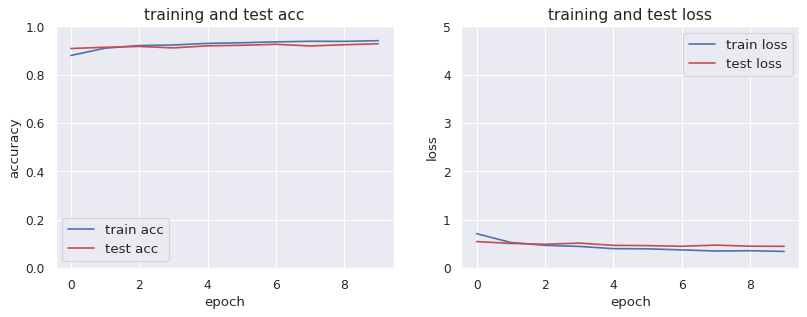

In [ ]:
#出力したテンソルのデバイスをCPUへ切り替える
device2 = torch.device('cpu')

train_acc = []
train_loss = []
test_acc = []
test_loss = []

for i in range(epochs):
    train_acc2 = train_acc_list[i].to(device2)
    train_acc3 = train_acc2.clone().numpy()
    train_acc.append(train_acc3)
    
    train_loss2 = train_loss_list[i].to(device2)
    train_loss3 = train_loss2.clone().detach().numpy()
    train_loss.append(train_loss3)
    
    test_acc2 = test_acc_list[i].to(device2)
    test_acc3 = test_acc2.clone().numpy()
    test_acc.append(test_acc3)
    
    test_loss2 = test_loss_list[i].to(device2)
    test_loss3 = test_loss2.clone().numpy()
    test_loss.append(test_loss3)

#取得したデータをグラフ化する
sns.set()
num_epochs = epochs

fig = plt.subplots(figsize=(12, 4), dpi=80)

ax1 = plt.subplot(1,2,1)
ax1.plot(range(num_epochs), train_acc, c='b', label='train acc')
ax1.plot(range(num_epochs), test_acc, c='r', label='test acc')
ax1.set_xlabel('epoch', fontsize='12')
ax1.set_ylabel('accuracy', fontsize='12')
ax1.set_title('training and test acc', fontsize='14')
ax1.legend(fontsize='12')
plt.ylim(0,1)

ax2 = plt.subplot(1,2,2)
ax2.plot(range(num_epochs), train_loss, c='b', label='train loss')
ax2.plot(range(num_epochs), test_loss, c='r', label='test loss')
ax2.set_xlabel('epoch', fontsize='12')
ax2.set_ylabel('loss', fontsize='12')
ax2.set_title('training and test loss', fontsize='14')
ax2.legend(fontsize='12')
plt.ylim(0,5)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
from tqdm import tqdm
import numpy as np

In [ ]:
net.eval()
prob_all = []
label_all = []
prob_score=[]

net=net.to(device)

i=0
for data, label in tqdm(test_loader):
        data = data.to(device)
        label = label.to(device)
        l2 = label.cpu().detach().numpy()
        label_all.extend(l2)
        prob = net(data)
        prob = prob.cpu().detach().numpy()
        prob_score.extend(prob) 
        prob_all.extend(np.argmax(prob,axis=1))
        i=i+1
#print(lable_all)
#print(prob_score)

100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


In [ ]:
print(len(prob)) #識別結果(確率)
#print(prob_all) #識別結果(対象)
#print(label_all)#データの取り出し(対象の表記)

100


In [ ]:
print(i)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

import torchvision.ops.boxes as bops


print("Accuracy:{:.4f}".format(accuracy_score(label_all, prob_all) ))
print("Recall:{:.4f}".format(recall_score(label_all, prob_all,average='macro') ))
print("Precision:{:.4f}".format(precision_score(label_all, prob_all,average='macro') ))
print("f1_score:{:.4f}".format(f1_score(label_all, prob_all,average='macro') ))
print(classification_report(label_all,prob_all,target_names=classes,digits=4))

#fpr, tpr, thresholds = roc_curve(label_all, prob_score, pos_label=2)
#print("Auc:{:.4f}".format(roc_auc_score(label_all, prob_score,average='macro') ))
print(confusion_matrix(prob_all,label_all))

#IoU追加

100
Accuracy:0.9288
Recall:0.9288
Precision:0.9291
f1_score:0.9287
              precision    recall  f1-score   support

       plane     0.9225    0.9520    0.9370      1000
         car     0.9498    0.9470    0.9484      1000
        bird     0.9451    0.9130    0.9288      1000
         cat     0.8999    0.8450    0.8716      1000
        deer     0.9367    0.9180    0.9273      1000
         dog     0.8789    0.9220    0.9000      1000
        frog     0.9212    0.9700    0.9450      1000
       horse     0.9578    0.9300    0.9437      1000
        ship     0.9414    0.9480    0.9447      1000
       truck     0.9374    0.9430    0.9402      1000

    accuracy                         0.9288     10000
   macro avg     0.9291    0.9288    0.9287     10000
weighted avg     0.9291    0.9288    0.9287     10000

[[952  11  10   8   4   0   2   4  29  12]
 [  3 947   3   3   1   2   3   2   6  27]
 [  4   2 913  12  15   9   2   8   1   0]
 [  4   1  18 845   6  43   8  10   3   1]
 [

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch, torchvision
import torchvision.transforms as T
import requests
import matplotlib.pyplot as plt
from PIL import Image

print(torch.__version__)         # 1.9.0+cu102
print(torchvision.__version__)   # 0.10.0+cu102

1.13.1+cu116
0.14.1+cu116


In [ ]:
import cv2
from google.colab.patches import cv2_imshow 

In [ ]:
#入力画像をモデルに入れる準備
device=torch.device("cuda")
file_name = 'animal.png'  #ここにファイルを突っ込む
input_image = Image.open('/content/gdrive/My Drive/picture/sample_picture/{}'.format(file_name)).convert('RGB')
img = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])(input_image).unsqueeze(0)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print(img.shape)

torch.Size([1, 3, 32, 32])


In [ ]:
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
trainloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

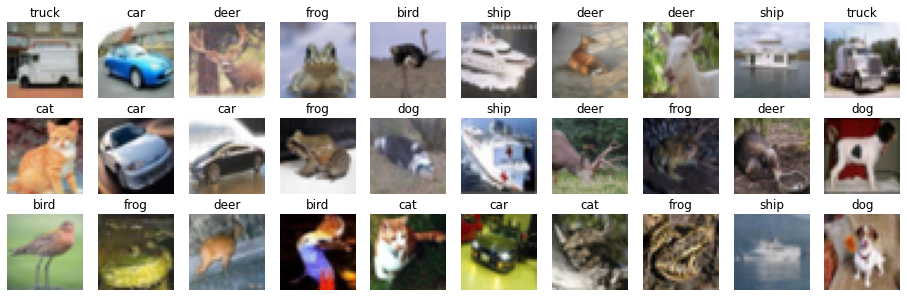

In [ ]:
pos = 1
#index = 0
index = random.randint(0, X_test.shape[0]/2)
i = index


# plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
plt.figure(figsize=(16,5))

# draw cifar10 images and label names
for img in X_test[index:index+30]:
    plt.subplot(3, 10, pos)
    plt.imshow(img)
    plt.axis('off')
    plt.title( classes[y_test[i][0]] )
    pos += 1
    i += 1

plt.show()

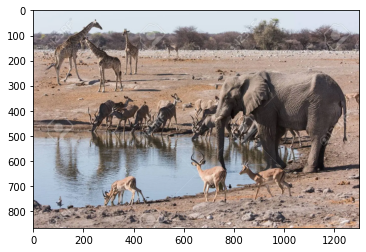

In [ ]:
plt.imshow(input_image)

In [ ]:
import torch
import random

No1.label_name： bird
No1.number_pred tensor(14.5562)
No1.label_name： dog
No1.number_pred tensor(15.6923)
No1.label_name： truck
No1.number_pred tensor(15.9916)
No1.label_name： bird
No1.number_pred tensor(14.4060)
No1.label_name： truck
No1.number_pred tensor(15.6366)
No1.label_name： car
No1.number_pred tensor(17.8060)
No1.label_name： car
No1.number_pred tensor(14.3486)
No1.label_name： dog
No1.number_pred tensor(12.0238)
No1.label_name： deer
No1.number_pred tensor(12.8492)
No1.label_name： horse
No1.number_pred tensor(11.7410)


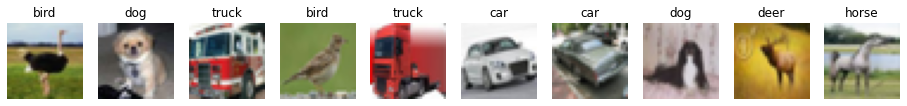

In [ ]:
#評価用
with torch.no_grad():
  pos = 1
#index = 0
  index = random.randint(0, X_test.shape[0]/2)
  i = index

# plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
  plt.figure(figsize=(16,5))

# draw cifar10 images and label names
  for img in X_test[index:index+10]:
      plt.subplot(3, 10, pos)
      pos += 1
      i += 1
      img = Image.fromarray(img)
      img_output = transforms.Compose([
      transforms.Resize((224, 224)), 
      transforms.ToTensor(),
      transforms.Normalize(0.5, 0.5),
      ])(img).unsqueeze(0)
      net=net.cpu()
      outputs = net(img_output)
      output=outputs.detach().numpy()

      label_max=np.argmax(output)
      pred=torch.max(outputs)
      print('No1.label_name：', classes[int(label_max)]) # 予想ラベル（最も確率の高い要素）
      plt.imshow(img)
      plt.axis('off')
      plt.title(classes[int(label_max)])   
      print('No1.number_pred' , pred)
     
    #print(outputs)  # (1, 1000)
#for idx in outputs.argsort():
 # print(f'{outputs[idx]:.5f} : {labels[idx]}', end='')

In [ ]:
#入力画像をモデルに入れる準備
device=torch.device("cuda")
file_name = 'animal.png'  #ここにファイルを突っ込む
input_image = Image.open('/content/gdrive/My Drive/picture/sample_picture/{}'.format(file_name)).convert('RGB')
img = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])(input_image).unsqueeze(0)

In [ ]:
#評価用
with torch.no_grad():
    net=net.cpu()
    outputs = net(img)
    print(outputs)  # (1, 1000)
print(outputs.argsort)

tensor([[-1.1941, -3.0986,  2.9184, -1.9693,  9.3317, -1.4045, -2.1353,  2.2767,
         -3.5218, -3.9124]])
<built-in method argsort of Tensor object at 0x7f6f4c5125e0>


label_name： deer
number_pred tensor(9.3317)


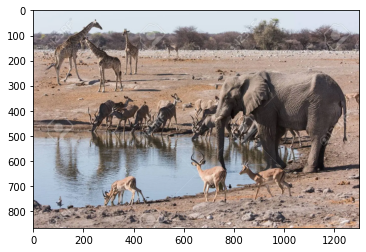

In [ ]:
plt.imshow(input_image)
label_max=np.argmax(outputs)
pred=torch.max(outputs)
print('label_name：', classes[int(label_max)]) # 予想ラベル（最も確率の高い要素）
print('number_pred' , pred)

In [ ]:
# ROC曲線を描写
fpr, tpr, thresholds = roc_curve(y_test, prob_all)
plt.plot(fpr, tpr, color=colors[0], label='logistic')
plt.fill_between(fpr, tpr, 0, color=colors[0], alpha=0.1)

fpr, tpr, thresholds = roc_curve(y_test, proba_rf)
plt.plot(fpr, tpr, color=colors[1], label='random forestss')
plt.fill_between(fpr, tpr, 0, color=colors[1], alpha=0.1)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# AUCの計算
print(f'ロジスティック回帰モデル AUR: {roc_auc_score(y_test, proba_lr):.4f}')
print(f'ランダムフォレストモデル AUR: {roc_auc_score(y_test, proba_rf):.4f}')

ValueError: ignored

In [ ]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.savefig('data/dst/sklearn_roc_curve.png')